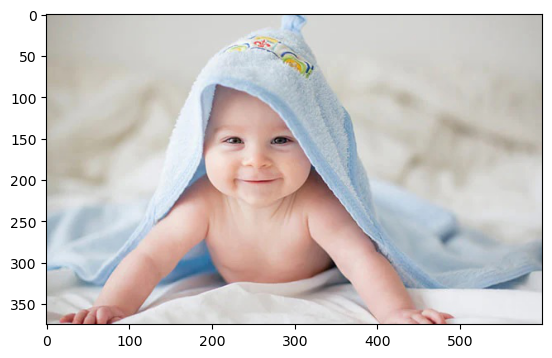

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'assets/sample.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [2]:
# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

# Check if the top prediction is a baby
is_baby = any(label in ['baby', 'infant', 'newborn'] for _, label, _ in decoded_predictions)

print("Is the image a baby?", is_baby)


1/1 [==============================] - 1s 1s/step
1: bath_towel (0.86)
2: bonnet (0.11)
3: diaper (0.01)
Is the image a baby? False


In [3]:
# modify
is_baby = any(label in ['baby', 'infant', 'newborn', 'bath_towel'] for _, label, _ in decoded_predictions)

print("Is the image a baby?", is_baby)

Is the image a baby? True
